In [1]:
from langgraph.graph import StateGraph, START, END, MessagesState
from langchain_openai import ChatOpenAI
from IPython.display import display, Image


In [6]:
from dotenv import find_dotenv, load_dotenv

dotenv_path = find_dotenv()  # Encuentra la ruta del archivo .env
load_dotenv(dotenv_path)  # Carga las variables de entorno desde el archivo .env

True

In [2]:
class State(MessagesState):
    pregunta: str

In [3]:
# Primer nodo con la consulta al pago de sueldos
def consulta_sueldos(state: dict):
    """Agente encargado de responder sobre las fechas de pago de remuneraciones"""
    pregunta = state.get("pregunta", "").lower()  # 🔹 Corregido para usar .get()

    if "fecha de pago" in pregunta:
        return {"pregunta": "Las fechas de pago de sueldos son el 30 de cada mes"}

    return {"pregunta": "Lo siento, no puedo responder a esa consulta."}



In [ ]:
# Segundo nodo para buscar infomación en internet respecto a los beneficios de caja los andes o programa construye tranquilo de la camara chilena de la construcción

def agent_beneficios(state: MessagesState):
    """Este agente se encargará de buscar información en internet acerca de los beneficios de los trabajadores"""
    
    

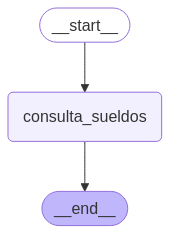

In [4]:
# Crear el flujo del grafo
workflow = StateGraph(State)

# Agregar nodos al grafo
workflow.add_node("consulta_sueldos", consulta_sueldos)

# Definir flujo de nodos
workflow.add_edge(START, "consulta_sueldos")
workflow.add_edge("consulta_sueldos", END)

# Compilar el grafo
graph = workflow.compile()

# Mostrar el grafo en una imagen
display(Image(graph.get_graph().draw_mermaid_png()))

In [5]:
estado_inicial = {"pregunta": "¿Cual es mi nombre?"}  # 🔹 Ahora es un diccionario
response = graph.invoke(estado_inicial)
print(response["pregunta"])  # 🔹 Accede correctamente a la respuesta

Lo siento, no puedo responder a esa consulta.
